In [1]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
from typing import List
import os


In [2]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)


TensorBoard version:  2.5.0a20210317


In [3]:
training_id = "GdT3NWjeQ6u7fBj5McxeTQ"
training_experiment = tb.data.experimental.ExperimentFromDev(training_id)
training_df = training_experiment.get_scalars()

In [4]:
#from: https://stackoverflow.com/questions/42281844/what-is-the-mathematics-behind-the-smoothing-parameter-in-tensorboards-scalar
# Weighted average for plotting
def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

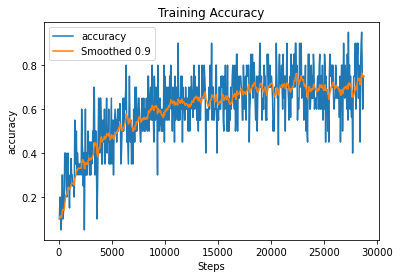

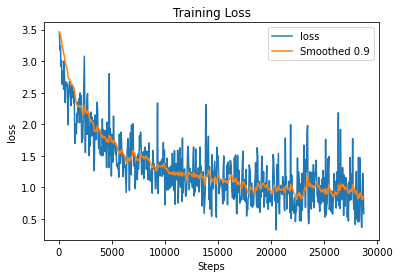

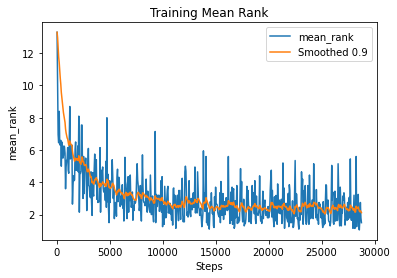

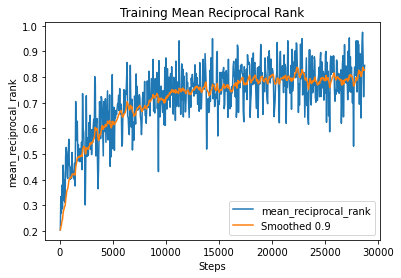

In [5]:
#Generate a plot for an individual metric
def generate_metric_plot(dataframe, metric_name, title, figure_path, smoothing):
    metric_frame = dataframe.loc[dataframe['tag'] == metric_name]
    metric_frame = metric_frame.reset_index()
    steps = metric_frame['step']
    values = metric_frame['value']
    smoothed = smooth(values, smoothing)
    plt.plot(steps, values, label=metric_name)
    plt.plot(steps, smoothed, label='Smoothed ' + str(smoothing))
    plt.legend()
    plt.title(title)
    plt.xlabel('Steps')
    plt.ylabel(metric_name)
    save_path = os.path.join(figure_path, metric_name)
    plt.savefig(save_path)
    plt.show()

    
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/baseline_and_blindfolding/training'

generate_metric_plot(training_df, 'accuracy', 'Training Accuracy', figure_path, 0.9)
generate_metric_plot(training_df, 'loss', 'Training Loss', figure_path, 0.9)
generate_metric_plot(training_df, 'mean_rank', 'Training Mean Rank', figure_path, 0.9)
generate_metric_plot(training_df, 'mean_reciprocal_rank', 'Training Mean Reciprocal Rank', figure_path, 0.9)

In [6]:
images_id = "9f80B9nWR5y7nWmZV7nrfg"
images_experiment = tb.data.experimental.ExperimentFromDev(images_id)
images_df = images_experiment.get_scalars()

In [7]:
images_df

,run,tag,step,value
0,vqa/tb,avg val accuracy,0,0.242857
1,vqa/tb,avg val accuracy,1,0.298469
2,vqa/tb,avg val accuracy,2,0.303061
3,vqa/tb,avg val accuracy,3,0.304082
4,vqa/tb,avg val accuracy,4,0.331122
...,...,...,...,...
195,vqa/tb,avg val mean reciprocal rank,45,0.522261
196,vqa/tb,avg val mean reciprocal rank,46,0.531473
197,vqa/tb,avg val mean reciprocal rank,47,0.520929
198,vqa/tb,avg val mean reciprocal rank,48,0.499865


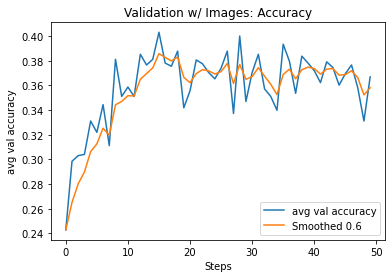

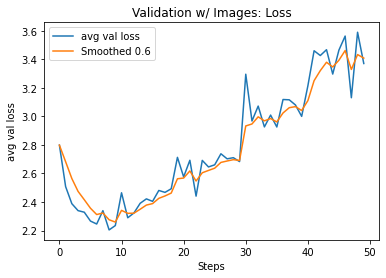

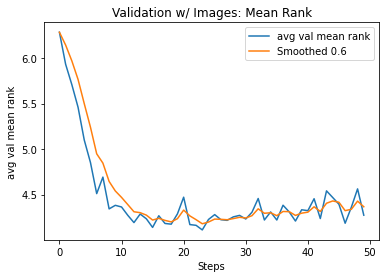

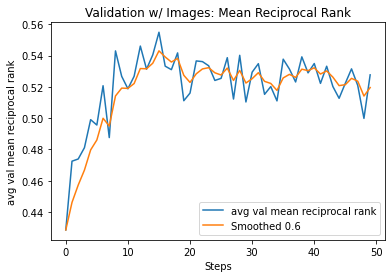

In [8]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/baseline_and_blindfolding/images'

generate_metric_plot(images_df, 'avg val accuracy', 'Validation w/ Images: Accuracy', figure_path, 0.6)
generate_metric_plot(images_df, 'avg val loss', 'Validation w/ Images: Loss', figure_path, 0.6)
generate_metric_plot(images_df, 'avg val mean rank', 'Validation w/ Images: Mean Rank', figure_path, 0.6)
generate_metric_plot(images_df, 'avg val mean reciprocal rank', 'Validation w/ Images: Mean Reciprocal Rank', figure_path, 0.6)

In [9]:
blindfolded_id = "zxt0S14pTpyed4TpSR9Rcw"
blindfolded_experiment = tb.data.experimental.ExperimentFromDev(blindfolded_id)
blindfolded_df = blindfolded_experiment.get_scalars()

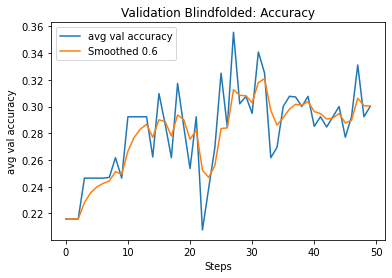

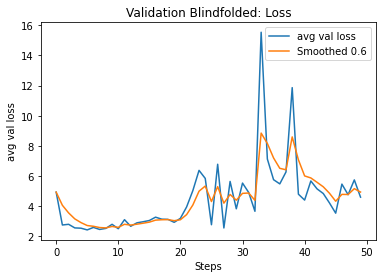

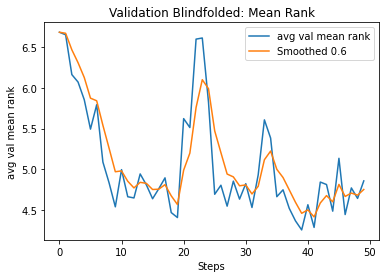

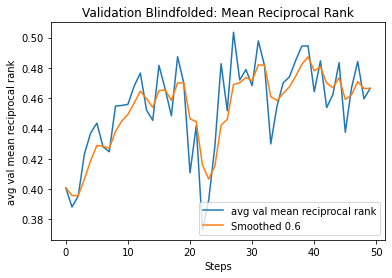

In [10]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/baseline_and_blindfolding/blindfolded'

generate_metric_plot(blindfolded_df, 'avg val accuracy', 'Validation Blindfolded: Accuracy', figure_path, 0.6)
generate_metric_plot(blindfolded_df, 'avg val loss', 'Validation Blindfolded: Loss', figure_path,  0.6)
generate_metric_plot(blindfolded_df, 'avg val mean rank', 'Validation Blindfolded: Mean Rank', figure_path, 0.6)
generate_metric_plot(blindfolded_df, 'avg val mean reciprocal rank', 'Validation Blindfolded: Mean Reciprocal Rank', figure_path, 0.6)

In [11]:
# gets information for first maximum value
def get_maximum_row(dataframe, metric_name):
    metric_frame = dataframe.loc[dataframe['tag'] == metric_name]
    ckpt = metric_frame[metric_frame['value']== metric_frame['value'].max()]['step'].values[0]
    return dataframe.loc[dataframe['step'] == ckpt]
    
    
# gets information for first minimum value
def get_minimum_row(dataframe, metric_name):
    metric_frame = dataframe.loc[dataframe['tag'] == metric_name]
    ckpt = metric_frame[metric_frame['value']== metric_frame['value'].min()]['step'].values[0]
    return dataframe.loc[dataframe['step'] == ckpt]


In [12]:
get_maximum_row(images_df, 'avg val accuracy')

,run,tag,step,value
15,vqa/tb,avg val accuracy,15,0.403061
65,vqa/tb,avg val loss,15,2.404433
115,vqa/tb,avg val mean rank,15,4.138265
165,vqa/tb,avg val mean reciprocal rank,15,0.554850


In [13]:
get_maximum_row(blindfolded_df, 'avg val accuracy')

,run,tag,step,value
27,tb,avg val accuracy,27,0.355612
77,tb,avg val loss,27,2.546098
127,tb,avg val mean rank,27,4.551021
177,tb,avg val mean reciprocal rank,27,0.503566


In [14]:
get_minimum_row(images_df, 'avg val mean rank')

,run,tag,step,value
23,vqa/tb,avg val accuracy,23,0.370408
73,vqa/tb,avg val loss,23,2.691763
123,vqa/tb,avg val mean rank,23,4.110714
173,vqa/tb,avg val mean reciprocal rank,23,0.533446


In [15]:
get_minimum_row(blindfolded_df, 'avg val mean rank')

,run,tag,step,value
39,tb,avg val accuracy,39,0.307653
89,tb,avg val loss,39,4.788071
139,tb,avg val mean rank,39,4.260204
189,tb,avg val mean reciprocal rank,39,0.494594


In [16]:
get_minimum_row(images_df, 'avg val loss')

,run,tag,step,value
8,vqa/tb,avg val accuracy,8,0.381122
58,vqa/tb,avg val loss,8,2.204141
108,vqa/tb,avg val mean rank,8,4.341837
158,vqa/tb,avg val mean reciprocal rank,8,0.542944


In [17]:
get_minimum_row(blindfolded_df, 'avg val loss')

,run,tag,step,value
5,tb,avg val accuracy,5,0.246429
55,tb,avg val loss,5,2.416477
105,tb,avg val mean rank,5,5.493877
155,tb,avg val mean reciprocal rank,5,0.443596


## Semantic Categories

In [18]:
category_training_id = "r96uoyBYTxKm1Buo6N0drg"
category_training_experiment = tb.data.experimental.ExperimentFromDev(category_training_id)
category_training_df = category_training_experiment.get_scalars()

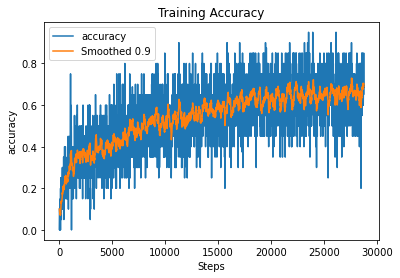

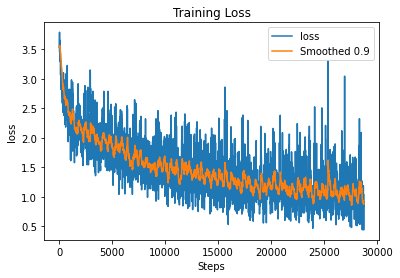

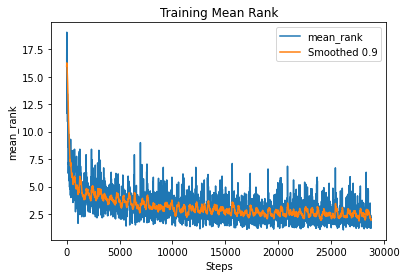

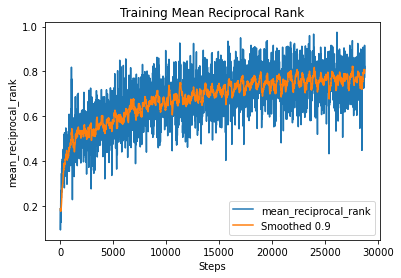

In [19]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/semantic_categories/training'

generate_metric_plot(category_training_df, 'accuracy', 'Training Accuracy', figure_path, 0.9)
generate_metric_plot(category_training_df, 'loss', 'Training Loss', figure_path, 0.9)
generate_metric_plot(category_training_df, 'mean_rank', 'Training Mean Rank', figure_path, 0.9)
generate_metric_plot(category_training_df, 'mean_reciprocal_rank', 'Training Mean Reciprocal Rank', figure_path, 0.9)

In [20]:
category_id = "6fkTYxZKTDqODVYTNMzOBw"
category_experiment = tb.data.experimental.ExperimentFromDev(category_id)
category_df = category_experiment.get_scalars()

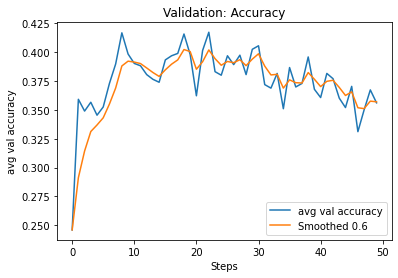

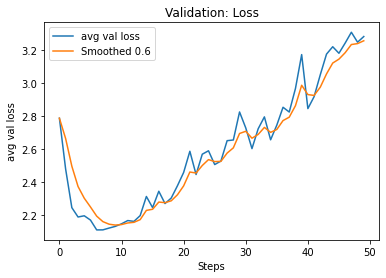

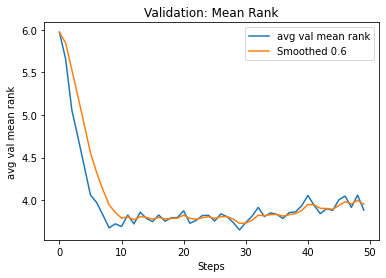

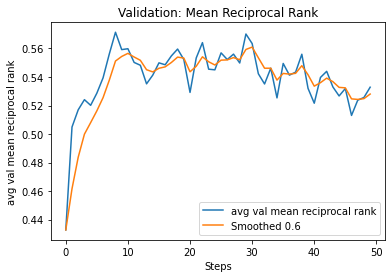

In [25]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/semantic_categories/eval'

generate_metric_plot(category_df, 'avg val accuracy', 'Validation: Accuracy', figure_path, 0.6)
generate_metric_plot(category_df, 'avg val loss', 'Validation: Loss', figure_path,  0.6)
generate_metric_plot(category_df, 'avg val mean rank', 'Validation: Mean Rank', figure_path, 0.6)
generate_metric_plot(category_df, 'avg val mean reciprocal rank', 'Validation: Mean Reciprocal Rank', figure_path, 0.6)

In [22]:
get_maximum_row(category_df, 'avg val accuracy')

,run,tag,step,value
22,.,avg val accuracy,22,0.417347
72,.,avg val loss,22,2.444937
122,.,avg val mean rank,22,3.761735
172,.,avg val mean reciprocal rank,22,0.564087


In [23]:
get_minimum_row(category_df, 'avg val loss')

,run,tag,step,value
6,.,avg val accuracy,6,0.372959
56,.,avg val loss,6,2.108628
106,.,avg val mean rank,6,3.971939
156,.,avg val mean reciprocal rank,6,0.539406


In [24]:
get_minimum_row(category_df, 'avg val mean rank')

,run,tag,step,value
29,.,avg val accuracy,29,0.402551
79,.,avg val loss,29,2.824962
129,.,avg val mean rank,29,3.650510
179,.,avg val mean reciprocal rank,29,0.570134
